In [45]:
#We chose regression in this task. Classification is best used for predicting where the "Stock" is heading, lower or higher. Where on the other side, regression is used for predicting the specific number. 
#We need to predict the price of Tesla on a specific date, thats why regression is the best option for us. 

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt



url="TSLA.csv"
df = pd.read_csv(url, sep=',')


df = df[['Date','Close']]
df.head()
df = df.drop(df.index[range(0, 2500)])

,Date,Close
2500,2020-06-04,172.876007
2501,2020-06-05,177.132004
2502,2020-06-08,189.983994
2503,2020-06-09,188.134003
2504,2020-06-10,205.009995


Text(0, 0.5, 'close price')

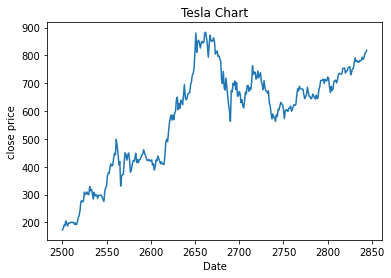

In [46]:
plt.figure()
plt.plot(df['Close'])
plt.title('Tesla Chart')
plt.xlabel('Date')
plt.ylabel('close price')

In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)
# Taken from the Slack Channel

X = pd.DataFrame(df["Date"]) 
y = pd.DataFrame(df["Close"]) 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

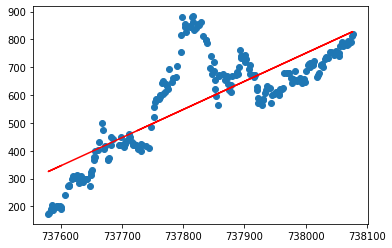

MSE = 12209.241754847786


In [50]:
plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

In [51]:
# A function to predict the price at a specific date
def predictPrice(date):
    prediction = linear_regressor.predict([[pd.to_datetime(date).toordinal()]])
    return prediction

In [52]:
#Type in the date which you want to predict the price of.
p = predictPrice("2020-10-25")
print(p)

[[469.83662998]]
